### Exploring Customer Segmentation


<center>
    <img src = images/segments.jpeg>
</center>


In this activity, you are tasked with profiling customer groups for a large telecommunications company.  The data provided contains information on customers purchasing and useage behavior with the telecom products.  Your goal is to use PCA and clustering to segment these customers into meaningful groups, and report back your findings.  

Because these results need to be interpretable, it is important to keep the number of clusters reasonable.  Think about how you might represent some of the non-numeric features so that they can be included in your segmentation models.  You are to report back your approach and findings to the class.  Be specific about what features were used and how you interpret the resulting clusters.

In [657]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

In [658]:
df = pd.read_csv('data/telco_churn_data.csv')

In [659]:
df.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,NaN,No,0.00,No,Yes,Fiber Optic,...,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,33.972119,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0


In [660]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              3166 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      5517 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

In [661]:
df.describe()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,1834.000000
mean,1.951867,32.386767,22.958954,21.110890,65.538800,2280.381264,1.962182,278.499225,749.099262,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,0.265370,4400.295755,1.338776,0.308107,3.005453
std,3.001199,24.542061,15.448113,20.948471,30.606805,2266.220462,7.902614,685.039625,846.660055,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,0.441561,1183.057152,1.430471,0.717514,1.256938
min,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,2003.000000,0.000000,0.000000,1.000000
25%,0.000000,9.000000,9.210000,3.000000,35.890000,400.150000,0.000000,0.000000,70.545000,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,3469.000000,0.000000,0.000000,2.000000
50%,0.000000,29.000000,22.890000,17.000000,71.968000,1394.550000,0.000000,0.000000,401.440000,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,4527.000000,1.000000,0.000000,3.000000
75%,3.000000,55.000000,36.395000,28.000000,90.650000,3786.600000,0.000000,182.620000,1191.100000,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,1.000000,5380.500000,2.000000,0.000000,4.000000
max,11.000000,72.000000,49.990000,94.000000,123.084000,8684.800000,49.790000,6477.000000,3564.720000,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,1.000000,6500.000000,9.000000,6.000000,5.000000


### Preparing and cleaning up data 

In [662]:
#Identify and create a list of object columns : 
object_cols = df.select_dtypes(include=['object']).columns.tolist()
print(object_cols)
print(len(object_cols))




['Customer ID', 'Referred a Friend', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'City', 'Churn Category', 'Churn Reason']
26


In [663]:
#Identify and create a list of non-object based columns in data:
numeric_cols = df.select_dtypes(exclude=['object']).columns.tolist()
print(numeric_cols)
print(len(numeric_cols))

['Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Regular Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Age', 'Number of Dependents', 'Zip Code', 'Latitude', 'Longitude', 'Population', 'Churn Value', 'CLTV', 'Total Customer Svc Requests', 'Product/Service Issues Reported', 'Customer Satisfaction']
20


In [664]:
#Create a data frame excluding all object columns for first phase PCA analysis of numerical data
df_numeric = df.drop(object_cols, axis = 1)

#Spot check new df created with numerical data 
print(df_numeric.shape)
df_numeric.info()

(7043, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Number of Referrals                7043 non-null   int64  
 1   Tenure in Months                   7043 non-null   int64  
 2   Avg Monthly Long Distance Charges  7043 non-null   float64
 3   Avg Monthly GB Download            7043 non-null   int64  
 4   Monthly Charge                     7043 non-null   float64
 5   Total Regular Charges              7043 non-null   float64
 6   Total Refunds                      7043 non-null   float64
 7   Total Extra Data Charges           7043 non-null   float64
 8   Total Long Distance Charges        7043 non-null   float64
 9   Age                                7043 non-null   int64  
 10  Number of Dependents               7043 non-null   int64  
 11  Zip Code                           7043 non-n

In [665]:
# Identify % of data that has null values and consider dropping column or alternative method to clean given data:
#  - Customer Satisifaction has ~ 73% of data as null so drop this column 
df.isnull().mean()*100



Customer ID                           0.000000
Referred a Friend                     0.000000
Number of Referrals                   0.000000
Tenure in Months                      0.000000
Offer                                55.047565
Phone Service                         0.000000
Avg Monthly Long Distance Charges     0.000000
Multiple Lines                        0.000000
Internet Service                      0.000000
Internet Type                        21.666903
Avg Monthly GB Download               0.000000
Online Security                       0.000000
Online Backup                         0.000000
Device Protection Plan                0.000000
Premium Tech Support                  0.000000
Streaming TV                          0.000000
Streaming Movies                      0.000000
Streaming Music                       0.000000
Unlimited Data                        0.000000
Contract                              0.000000
Paperless Billing                     0.000000
Payment Metho

In [666]:
# Identify unique values to get a sense of the sample data and values
col_features = df_numeric.columns.values.tolist() 
for item in col_features: 
    #print(item)
    #Format printing as you would like for future arra list output as feature: array list 
    #print(data[item].unique())
    print('{0} \t {1} \n'.format(item, df_numeric[item].unique()))

Number of Referrals 	 [ 0  1  6  2  4  3  7  5  8  9 10 11] 

Tenure in Months 	 [ 1  8 18 25 37 27 58 15  7 11  3 13 16 24  4 32 54  2 21 55  5 20 65 49
 43 56 52 33 30 46  9 10 35 44 62 14 12 17 39 68 34 22 19 23 42 41 57 38
 29 66 69 40 31 59 36 45 53 70 47 50 51 72 26  6 28 48 61 71 60 64 67 63] 

Avg Monthly Long Distance Charges 	 [ 0.   48.85 11.33 ... 44.99 44.98  8.62] 

Avg Monthly GB Download 	 [ 9 19 57 13 15 20 33 26 21 32 31 12 10  8 16  2 11  6 14  0 30 29 24 28
 23 22  7 18 25  4  3  5 27 58 17 53 75 56 52 76 64 45 63 62 78 80 84 65
 90 46 43 94 51 48 73 69 71 42 41 59 47 82 85] 

Monthly Charge 	 [41.236 83.876 99.268 ... 72.    65.45  78.7  ] 

Total Regular Charges 	 [  39.65  633.3  1752.55 ... 7362.9   346.45 6844.5 ] 

Total Refunds 	 [ 0.   45.61 13.43 40.95 11.05 29.84 49.57 12.07 40.64 10.2  17.88 37.55
 48.09 32.46 20.23 12.59 43.31  8.13 46.64 23.33 47.2  33.25 33.73 49.06
 25.79 15.24 26.99 44.58 20.16  8.88 12.48  6.79 39.29 44.31  5.49 25.67
  9.49 29.17 1

In [667]:
#Take a look at object data for unique values as well 
for item in object_cols: 
    #print(item)
    #Format printing as you would like for future arra list output as feature: array list 
    #print(data[item].unique())
    print('{0} \t {1} \n'.format(item, df[item].unique()))

Customer ID 	 ['8779-QRDMV' '7495-OOKFY' '1658-BYGOY' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK'] 

Referred a Friend 	 ['No' 'Yes'] 

Offer 	 [nan 'Offer E' 'Offer D' 'Offer C' 'Offer B' 'Offer A'] 

Phone Service 	 ['No' 'Yes'] 

Multiple Lines 	 ['No' 'Yes'] 

Internet Service 	 ['Yes' 'No'] 

Internet Type 	 ['Fiber Optic' 'Cable' 'DSL' nan] 

Online Security 	 ['No' 'Yes'] 

Online Backup 	 ['No' 'Yes'] 

Device Protection Plan 	 ['Yes' 'No'] 

Premium Tech Support 	 ['No' 'Yes'] 

Streaming TV 	 ['No' 'Yes'] 

Streaming Movies 	 ['Yes' 'No'] 

Streaming Music 	 ['No' 'Yes'] 

Unlimited Data 	 ['No' 'Yes'] 

Contract 	 ['Month-to-Month' 'One Year' 'Two Year'] 

Paperless Billing 	 ['Yes' 'No'] 

Payment Method 	 ['Bank Withdrawal' 'Credit Card' 'Mailed Check'] 

Gender 	 ['Male' 'Female'] 

Under 30 	 ['No' 'Yes'] 

Senior Citizen 	 ['Yes' 'No'] 

Married 	 ['No' 'Yes'] 

Dependents 	 ['No' 'Yes'] 

City 	 ['Los Angeles' 'Inglewood' 'Whittier' ... 'Topaz' 'Jacumba' 'Holtville'] 


#### Drop Columns from Numeric df 

Drop the following columns: 
- customer_id as this is simply the unique identifier and we don't require this for to execute PCA on data set
- customer_satisifactoin column as it has high % of NA - likely due to it not being a required filed for data entry 
- *Zip Code*, *Latitude*, *Longitude* are numerical values that are in essence Qualitative values or categorical values - drop them as well for PCA first pass attempt 
- There were other features that had a high % of NA from above I dropped in case I was going to combine some categorical values as I wanted to start wtih only Numeric featurs for the analyis so I dropped the following features as well: 
    - *Offer* , *Churn Catefory*, *Churn Reason*, *Customer Satisfaction* , with each % NA respectively at : 55%, 73%, 73%, 74% 

In [668]:
df_clean_nona = ''

object_cols = df.select_dtypes('object').columns.tolist() + ['Customer Satisfaction', 'Zip Code', 'Latitude', 'Longitude', 'Offer', 'Churn Reason', 'Customer Satisfaction']
df_clean = df.drop(object_cols, axis = 1)

df_clean_nona = df_clean.dropna()

#Check resulting df
df_clean_nona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Number of Referrals                7043 non-null   int64  
 1   Tenure in Months                   7043 non-null   int64  
 2   Avg Monthly Long Distance Charges  7043 non-null   float64
 3   Avg Monthly GB Download            7043 non-null   int64  
 4   Monthly Charge                     7043 non-null   float64
 5   Total Regular Charges              7043 non-null   float64
 6   Total Refunds                      7043 non-null   float64
 7   Total Extra Data Charges           7043 non-null   float64
 8   Total Long Distance Charges        7043 non-null   float64
 9   Age                                7043 non-null   int64  
 10  Number of Dependents               7043 non-null   int64  
 11  Population                         7043 non-null   int64

### Scaling Data (preparing for PCA)

In [669]:
df_scaled = ''

# Normalize data : (X-Xmean / Xstd )
df_scaled = (df_clean_nona - df_clean_nona.mean())/df_clean_nona.std()

#Check df scaled info / spot check: 
print(df_scaled.shape)
print(type(df_scaled))

(7043, 16)
<class 'pandas.core.frame.DataFrame'>


#### PCA 
- Leveragethe `PCA` transformer from scikitlearn to transform your data and select the top three principal components.  
- Create an instance of the `PCA` that limits the number of components to 3 using the `n_components` argument.  
- set the argument `random_state = 42`  and assign your instance as `pca` variable 


In [670]:
pca = ''

pca = PCA(n_components=3, random_state=42)

print(pca)
print(pca.n_components)

PCA(n_components=3, random_state=42)
3


#### Build a Scree Plot - assess ideal component # 
- Use the Shree Plot to identify the elbow for ideal component # to reduce to for modeling 
- Use the Cumulative Variance Explained to map the % variation for each component to make a decision clearer
- Use an 80% cumulative variance explained level for first iterstion of PCA components to leverage 

In [671]:
components = ''


pca = PCA(n_components=16, random_state = 42)
components = pca.fit_transform(df_scaled)


print(type(components))
print(components.shape)

<class 'numpy.ndarray'>
(7043, 16)


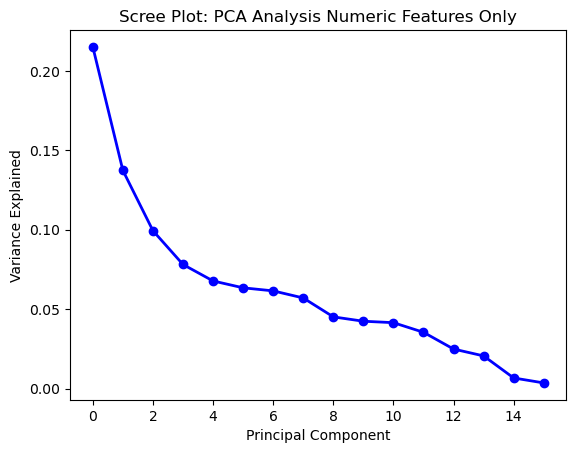

In [672]:
PC_Values = ''

PC_values = np.arange(pca.n_components_)
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot: PCA Analysis Numeric Features Only')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

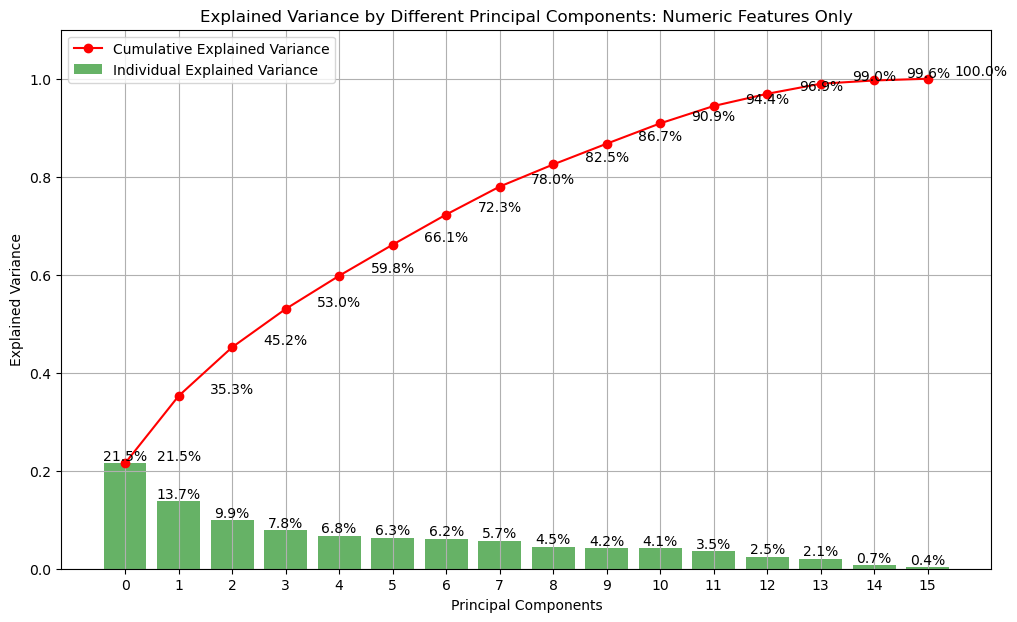

In [673]:
# Create the bar plot for individual variances
# Reference Medium Blog Article for code reuse for problem: https://medium.com/@megha.natarajan/understanding-cumulative-explained-variance-in-pca-with-python-653e3592a77c

cumulitive_variance_explained = ''

cumulitive_variance_explained = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(12, 7))
bar = plt.bar(range(0, 16), pca.explained_variance_ratio_, alpha=0.6, color='g', label='Individual Explained Variance')

# Create the line plot for cumulative variance
line = plt.plot(cumulitive_variance_explained, marker='o', linestyle='-', color='r', 
                label='Cumulative Explained Variance')

# Adding percentage values on top of bars and dots
for i, (bar, cum_val) in enumerate(zip(bar, cumulitive_variance_explained)):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{pca.explained_variance_ratio_[i]*100:.1f}%', 
             ha='center', va='bottom')
    plt.text(i+1, cum_val, f'{cum_val*100:.1f}%', ha='center', va='bottom')

# Aesthetics for the plot
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Different Principal Components: Numeric Features Only')
plt.xticks(range(0, 16))
plt.legend(loc='upper left')
plt.ylim(0, 1.1)  # extend y-axis limit to accommodate text labels
plt.grid(True)
plt.show()

### Visualize initial assessment of 2 & 3 components
- Use the 2 component analysis - 2D Plot
- Use the 3 component anlaysis - 3D Plot 
- Leverage the Customer Life Time Value 'CLTV' feature as an output variable (dependent variable to color analysis by)
    - CLTV typically is an outcome that enterprises want to maximize and analyze pattenrs in retail to increase that amount per customer 


<class 'numpy.ndarray'>
(7043, 2)


Text(0, 0.5, 'pc2')

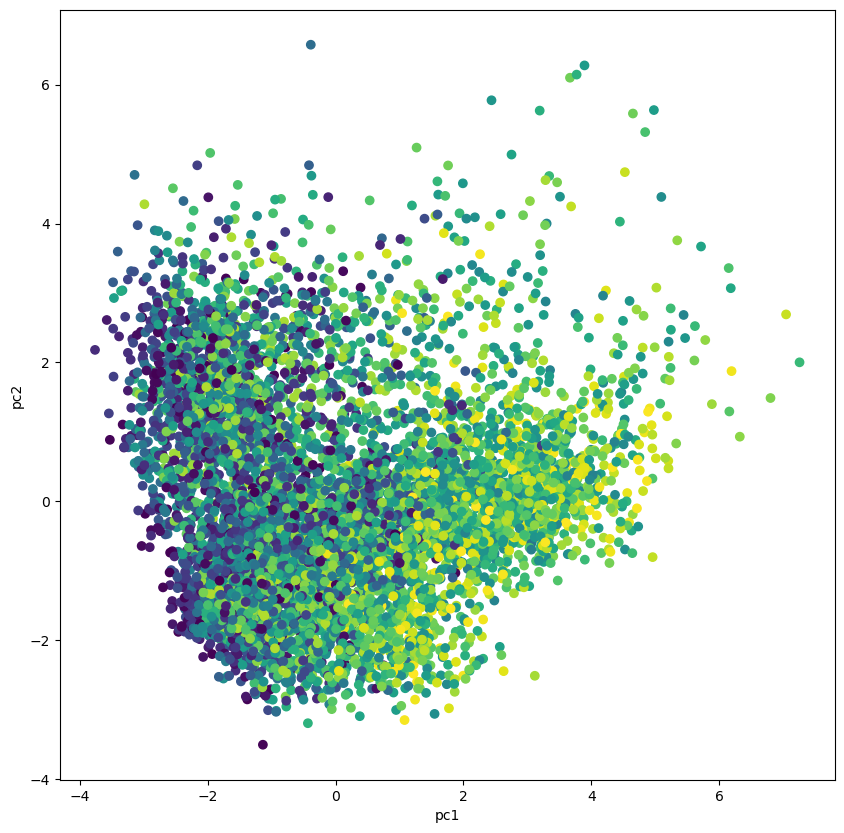

In [674]:
pca = PCA(n_components=2, random_state = 42)
components = pca.fit_transform(df_scaled)
x2c = pca.transform(df_scaled)

print(type(components))
print(components.shape)

#Plot 2 component graph for reveiw of features for 2 components 
#
plt.figure(figsize=(10,10))
plt.scatter(x2c[:, 0], x2c[:, 1], c=df['CLTV'])
plt.xlabel('pc1')
plt.ylabel('pc2')

<class 'numpy.ndarray'>
(7043, 3)


Text(0.5, 0, 'PC3')

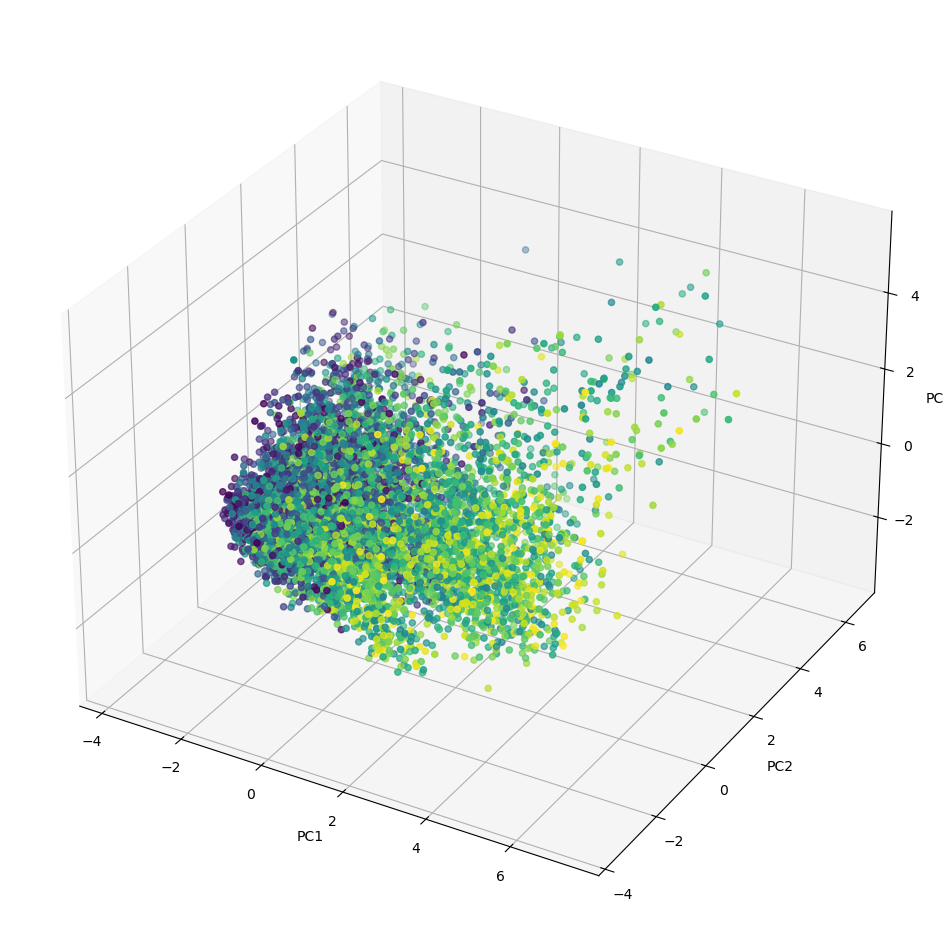

In [675]:
pca = PCA(n_components=3, random_state = 42)
components = pca.fit_transform(df_scaled)
x3c = pca.transform(df_scaled)

print(type(components))
print(components.shape)

#Plot 2 component graph for reveiw of features for 2 components 
#
fig = plt.figure(figsize=(12,12))
axis = fig.add_subplot(111, projection='3d')

axis.scatter(x3c[:, 0], x3c[:, 1], x3c[:,2], c=df['CLTV'])
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

### K-Means - Run and Configure analysis 
- Use the optimal components from above Scree Plot of a *PCA with 4 principal components* 
- Re-run wtih PCA based on above Scree Plot for an 80% combined cumulative vairance of *PCA with 10 principal components*

In [676]:
components_1 = ''


pca = PCA(n_components=4, random_state = 42)
components_1 = pca.fit_transform(df_scaled)

In [677]:
kmeans=''
df_clustered = df_clean_nona

kmeans = KMeans(n_clusters=4, random_state=42, verbose=True).fit(components_1)
df_clustered['cluster'] = kmeans.labels_

# Spot check df clustered outcome 
print(type(df_clustered))
print(df_clustered.shape)

df_clustered.info()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Initialization complete
Iteration 0, inertia 41513.57989226175.
Iteration 1, inertia 31665.464016770686.
Iteration 2, inertia 30268.038385512307.
Iteration 3, inertia 30138.217629447947.
Iteration 4, inertia 30102.240074677073.
Iteration 5, inertia 30071.46306701107.
Iteration 6, inertia 30035.316498790755.
Iteration 7, inertia 29983.097407649137.
Iteration 8, inertia 29906.040021931592.
Iteration 9, inertia 29786.603297705075.
Iteration 10, inertia 29647.712526649142.
Iteration 11, inertia 29517.138210421723.
Iteration 12, inertia 29432.983242448645.
Iteration 13, inertia 29391.176239366072.
Iteration 14, inertia 29375.424655715506.
Iteration 15, inertia 29361.665401529448.
Iteration 16, inertia 29340.723544369357.
Iteration 17, inertia 29309.026732647148.
Iteration 18, inertia 29251.539206051664.
Iteration 19, inertia 29189.737913664412.
Iteration 20, inertia 29130.549800999706.
Iteration 21, inertia 29055.788490507533.
Iteration 22, inertia 28982.928223813477.
Iteration 23, inertia 

In [678]:
df_clustered.sample(20)

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Number of Dependents,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,cluster
3462,0,23,35.32,0,20.850,473.90,0.00,0.0,812.36,45,0,16164,0,4263,0,0,2
771,10,72,15.82,13,78.450,5682.25,0.00,0.0,1139.04,68,0,1279,0,4032,1,0,1
4199,0,12,18.12,0,19.450,246.25,0.00,0.0,217.44,38,0,58555,0,4788,2,0,2
3182,0,21,34.39,0,20.000,417.70,0.00,0.0,722.19,59,0,51665,0,2366,0,0,2
1174,1,2,11.51,58,108.576,242.80,45.44,141.0,23.02,26,3,26753,1,4690,5,2,0
872,10,56,11.55,27,95.650,5471.75,21.71,1477.0,646.80,80,0,16198,0,6335,2,0,1
5629,4,72,5.81,29,114.050,8289.20,0.00,0.0,418.32,56,1,404,0,6254,3,0,1
1140,0,6,0.00,24,44.400,263.05,0.00,0.0,0.00,75,0,6242,0,4611,0,0,2
6734,5,70,40.77,71,116.550,8152.30,0.00,5788.0,2853.90,21,2,843,0,6116,1,0,3
4876,2,24,44.93,82,79.650,1928.70,0.00,0.0,1078.32,24,0,3577,0,3816,1,0,3


### Create Box Plots against various features based upon cluster values 
- Create box plots for cluster on x axis vs. CLTV on y axis 
- Look at following features: Tenure, Age, Total Extra Data Charges, 
- Others?? 

<Axes: xlabel='cluster', ylabel='CLTV'>

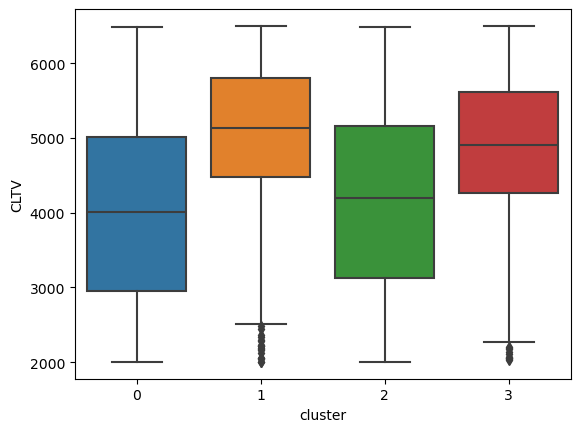

In [679]:
sns.boxplot(x='cluster', y='CLTV', data=df_clustered)

<Axes: xlabel='cluster', ylabel='Total Long Distance Charges'>

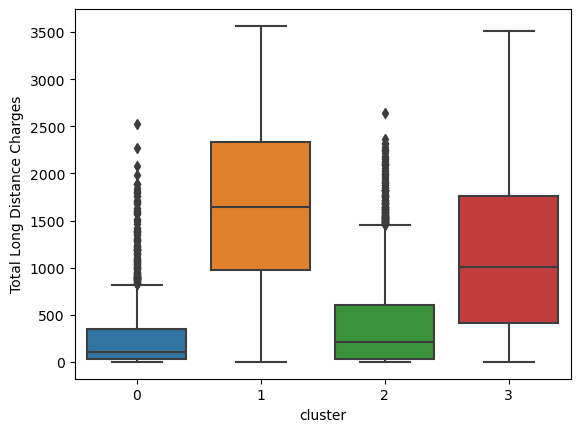

In [680]:
sns.boxplot(x='cluster', y='Total Long Distance Charges', data=df_clustered)

<Axes: xlabel='cluster', ylabel='Monthly Charge'>

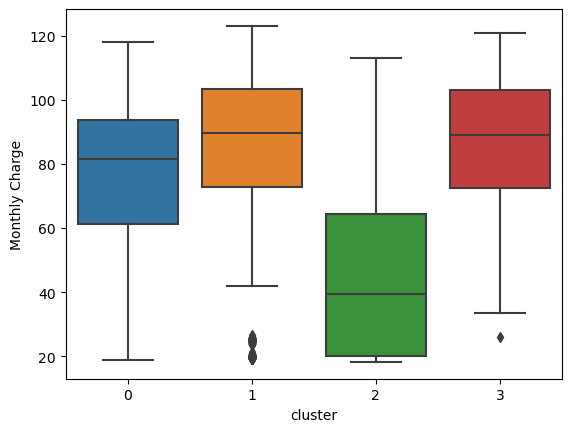

In [681]:
sns.boxplot(x='cluster', y='Monthly Charge', data=df_clustered)

<Axes: xlabel='cluster', ylabel='Age'>

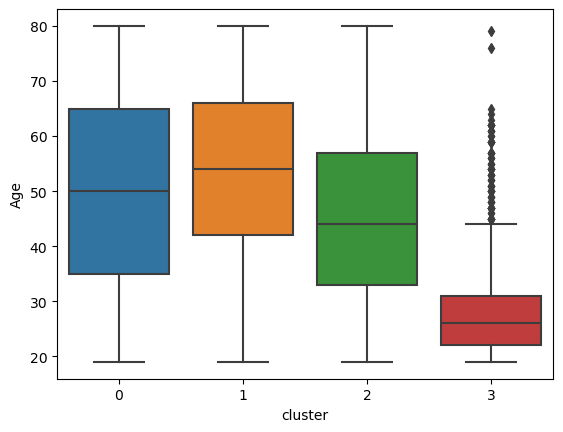

In [682]:
sns.boxplot(x='cluster', y='Age', data=df_clustered)

<Axes: xlabel='cluster', ylabel='Avg Monthly GB Download'>

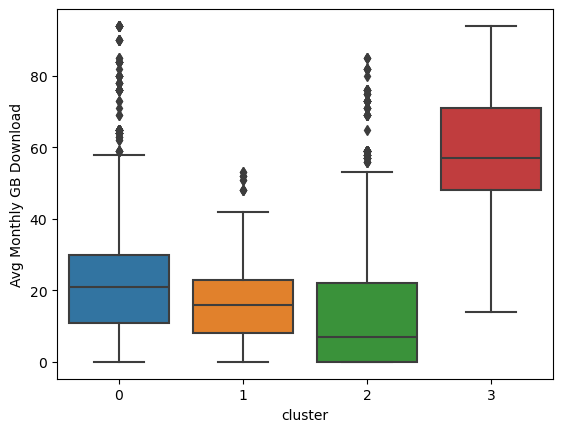

In [683]:
sns.boxplot(x='cluster', y='Avg Monthly GB Download', data=df_clustered) 

In [705]:
fig_km2 = px.box(df_clustered, x='cluster', y='Avg Monthly GB Download', hover_name='Age', color='cluster', points="all")
fig_km2.update_traces(quartilemethod="inclusive")
 
fig_km2.show()

### Consider adding a few Non-Numeric (object type) to Phase 2 Analysis 

#### Preparing and Cleaning up Data : Numeric + Select Categorical Features Analysis
- Limit data based upon phase 1 Analysis for Phase 2 Analysis to following Categorical Features:
    - No null values & Yes/No responses : Replace feature columns with numerical values Yes=1, No=0 and convert feature column type to Int64 from Object type
        - Add following categories to Phase 2: Streaming TV, Streaming Movies, Streaming Music, Unlimited Data for Categorical features to convert to incorporate into PCA Analysis Phase 2 
    - Follow same process as in Phase 1 to drop columns with high NA %

In [685]:
df_clean_nona_2 = ''
object_cols_2 = ''
object_cols_2_reduced =''

object_cols_2 = df.select_dtypes('object').columns.tolist() + ['Customer Satisfaction', 'Zip Code', 'Latitude', 'Longitude', 'Offer', 'Churn Reason', 'Customer Satisfaction']
print(object_cols_2)
# Reduce the dropped feature for object type to the ones we want to add to Phase 2 PCA : remove Streaming TV, Streaming Movies, Streaming Music, Unlimited Data
object_cols_2_reduced = ['Customer ID', 'Referred a Friend', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', \
'Premium Tech Support', 'Contract', 'Paperless Billing', 'Payment Method', 'Gender', 'Under 30', 'Senior Citizen',\
 'Married', 'Dependents', 'City', 'Churn Category', 'Churn Reason', 'Customer Satisfaction', 'Zip Code', 'Latitude', 'Longitude', 'Offer', 'Churn Reason', 'Customer Satisfaction']

df_clean_2 = df.drop(object_cols_2_reduced, axis = 1)

df_clean_nona_2 = df_clean_2.dropna()

#Check resulting df
df_clean_nona_2.info()

['Customer ID', 'Referred a Friend', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'City', 'Churn Category', 'Churn Reason', 'Customer Satisfaction', 'Zip Code', 'Latitude', 'Longitude', 'Offer', 'Churn Reason', 'Customer Satisfaction']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Number of Referrals                7043 non-null   int64  
 1   Tenure in Months                   7043 non-null   int64  
 2   Avg Monthly Long Distance Charges  7043 non-null   float64
 3   Avg Monthly GB Downlo

#### Prepare object featurs that are yes/no to 0 and 1 - convert to int64 
- use string replace for 4 featurs with Yes=1, No=0 
- use 

In [686]:


df_clean_nona_2.replace("Yes", "1", inplace=True)

#Verify replacement of Yes to 1 
df_clean_nona_2["Unlimited Data"].value_counts()

Unlimited Data
No    4339
1     2704
Name: count, dtype: int64

In [687]:
df_clean_nona_2.replace("No", "0", inplace=True)

#Verify replacement of No to 0 
df_clean_nona_2["Unlimited Data"].value_counts()

Unlimited Data
0    4339
1    2704
Name: count, dtype: int64

In [688]:
feat_conv=''
feat_conv = df_clean_nona_2.select_dtypes('object').columns.tolist()
print(feat_conv)

for x in feat_conv:
    df_clean_nona_2[x] = pd.to_numeric(df_clean_nona_2[x])



['Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data']


In [689]:
df_clean_nona_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Number of Referrals                7043 non-null   int64  
 1   Tenure in Months                   7043 non-null   int64  
 2   Avg Monthly Long Distance Charges  7043 non-null   float64
 3   Avg Monthly GB Download            7043 non-null   int64  
 4   Streaming TV                       7043 non-null   int64  
 5   Streaming Movies                   7043 non-null   int64  
 6   Streaming Music                    7043 non-null   int64  
 7   Unlimited Data                     7043 non-null   int64  
 8   Monthly Charge                     7043 non-null   float64
 9   Total Regular Charges              7043 non-null   float64
 10  Total Refunds                      7043 non-null   float64
 11  Total Extra Data Charges           7043 non-null   float

### Scaling Data and Preparing for PCA 2 (with categorical columns added)

In [690]:
df_scaled_2 = ''

# Normalize data : (X-Xmean / Xstd )
df_scaled_2 = (df_clean_nona_2 - df_clean_nona_2.mean())/df_clean_nona_2.std()

#Check df scaled info / spot check: 
print(df_scaled_2.shape)
print(type(df_scaled_2))

(7043, 20)
<class 'pandas.core.frame.DataFrame'>


#### PCA Phase 2 (with categorical columns added)

#### Build a Scree Plot PCA Phase 2  - assess ideal component # 
- Use the Shree Plot to identify the elbow for ideal component # to reduce to for modeling 
- Use the Cumulative Variance Explained to map the % variation for each component to make a decision clearer
- Use an 80% cumulative variance explained level for first iterstion of PCA components to leverage 

In [691]:
components_2 = ''
pca_2 = ''

pca_2 = PCA(n_components=20, random_state = 42)
components_2 = pca_2.fit_transform(df_scaled_2)


print(type(components_2))
print(components_2.shape)

<class 'numpy.ndarray'>
(7043, 20)


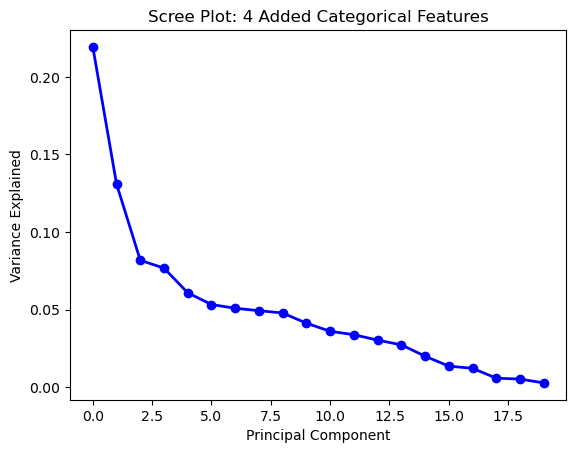

In [692]:
PC_Values_2 = ''

PC_values_2 = np.arange(pca_2.n_components_)
plt.plot(PC_values_2, pca_2.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot: 4 Added Categorical Features')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

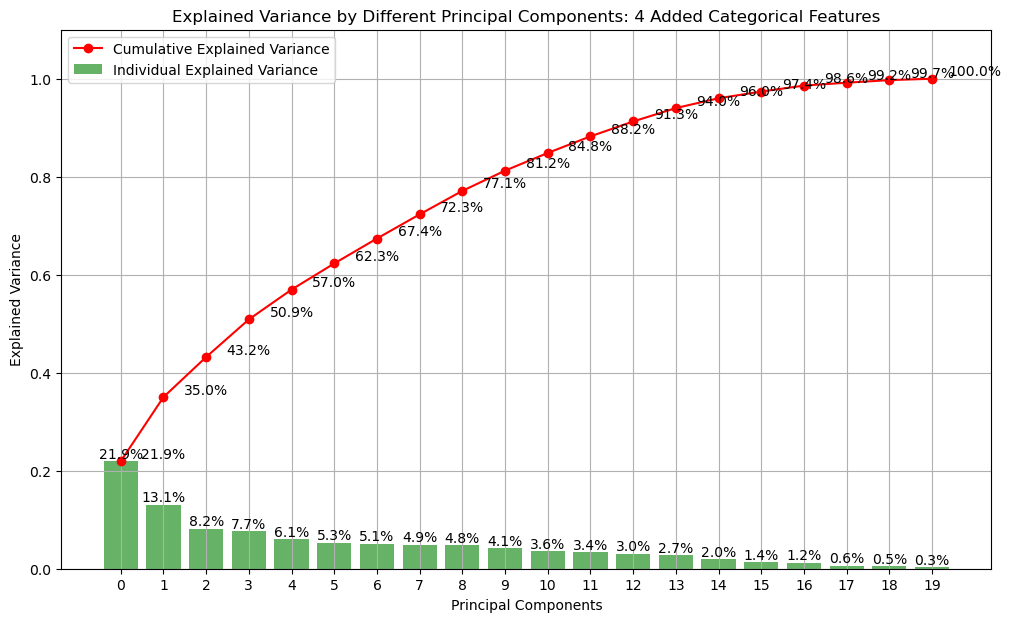

In [693]:
# Create the bar plot for individual variances
# Reference Medium Blog Article for code reuse for problem: https://medium.com/@megha.natarajan/understanding-cumulative-explained-variance-in-pca-with-python-653e3592a77c

cumulitive_variance_explained_2 = ''

cumulitive_variance_explained_2 = np.cumsum(pca_2.explained_variance_ratio_)

plt.figure(figsize=(12, 7))
bar = plt.bar(range(0, 20), pca_2.explained_variance_ratio_, alpha=0.6, color='g', label='Individual Explained Variance')

# Create the line plot for cumulative variance
line = plt.plot(cumulitive_variance_explained_2, marker='o', linestyle='-', color='r', 
                label='Cumulative Explained Variance')

# Adding percentage values on top of bars and dots
for i, (bar, cum_val) in enumerate(zip(bar, cumulitive_variance_explained_2)):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{pca_2.explained_variance_ratio_[i]*100:.1f}%', 
             ha='center', va='bottom')
    plt.text(i+1, cum_val, f'{cum_val*100:.1f}%', ha='center', va='bottom')

# Aesthetics for the plot
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Different Principal Components: 4 Added Categorical Features')
plt.xticks(range(0, 20))
plt.legend(loc='upper left')
plt.ylim(0, 1.1)  # extend y-axis limit to accommodate text labels
plt.grid(True)
plt.show()

### K-Means - 2nd Analysis - Run and Configure analysis 
- Use the optimal components from above Scree Plot of a *PCA with 4 principal components* : *Note* not much reduction in dimensionality with the addition of 4 additional categorical values*
- Re-run wtih PCA based on above Scree Plot for an 80% combined cumulative vairance of *PCA with 10 principal components* : *Note* an increase in total number of principle components required to get to 80% combined cumulative variance with the addition of 4 feature/categorical as well.  

In [694]:
components_3 = ''
pca_3 = ''


pca_3 = PCA(n_components=4, random_state = 42)
components_3 = pca_3.fit_transform(df_scaled_2)

In [695]:
df_clustered_2 = df_clean_nona_2
df_clustered_2['cluster'] = ''


kmeans_2 = KMeans(n_clusters=4, init='k-means++', verbose=True).fit(components_3)

print(type(kmeans_2))
print(kmeans_2.labels_)
df_clustered_2['cluster'] = kmeans_2.labels_

# Spot check df clustered outcome 
print(type(df_clustered_2))
print(df_clustered_2.shape)

df_clustered_2.info()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Initialization complete
Iteration 0, inertia 50334.133671741736.
Iteration 1, inertia 34523.49516813477.
Iteration 2, inertia 33701.48541310764.
Iteration 3, inertia 33492.34953894155.
Iteration 4, inertia 33449.23587845874.
Iteration 5, inertia 33440.044070876764.
Iteration 6, inertia 33435.945793837.
Iteration 7, inertia 33434.55969729363.
Iteration 8, inertia 33433.41788478455.
Iteration 9, inertia 33431.1182775336.
Iteration 10, inertia 33429.3287418638.
Converged at iteration 10: center shift 0.00016082193522004554 within tolerance 0.0002543512179017892.
Initialization complete
Iteration 0, inertia 40403.10339904847.
Iteration 1, inertia 34831.13174215203.
Iteration 2, inertia 34036.27521834592.
Iteration 3, inertia 33840.445071276336.
Iteration 4, inertia 33740.39017983128.
Iteration 5, inertia 33671.66925211542.
Iteration 6, inertia 33625.91972907128.
Iteration 7, inertia 33594.3559026172.
Iteration 8, inertia 33563.43995924172.
Iteration 9, inertia 33538.950682523806.
Iteration

In [696]:
df_clustered_2.sample(20)

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Monthly Charge,Total Regular Charges,...,Total Extra Data Charges,Total Long Distance Charges,Age,Number of Dependents,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,cluster
4207,0,1,1.15,23,0,0,0,1,70.100,70.10,...,0.00,1.15,53,0,138,0,2475,0,0,1
2495,0,54,46.74,18,1,1,1,0,115.544,6014.85,...,1083.00,2523.96,56,0,75319,1,5527,3,4,2
4009,0,72,0.00,14,1,1,1,1,63.700,4464.80,...,0.00,0.00,36,0,6918,0,4921,1,2,0
5101,4,72,35.62,0,0,0,0,0,25.100,1857.85,...,0.00,2564.64,43,2,15177,0,5611,1,1,1
4595,1,40,29.46,28,1,1,1,1,106.000,4178.65,...,0.00,1178.40,37,0,269,0,5118,0,0,0
4765,0,1,13.63,13,0,0,0,0,44.950,44.95,...,0.00,13.63,61,0,25566,0,3256,0,0,1
11,0,15,29.11,32,0,0,0,0,77.376,1074.30,...,344.00,436.65,65,0,33817,1,4616,0,0,3
974,1,30,2.86,19,0,0,0,0,77.900,2351.45,...,447.00,85.80,65,0,44652,0,2009,0,0,1
1722,0,7,18.10,16,0,0,0,0,78.468,480.75,...,77.00,126.70,35,0,23224,1,2872,0,0,3
4803,0,1,15.76,13,0,0,0,0,44.900,44.90,...,0.00,15.76,44,0,57017,0,2451,0,0,1


<Axes: xlabel='cluster', ylabel='CLTV'>

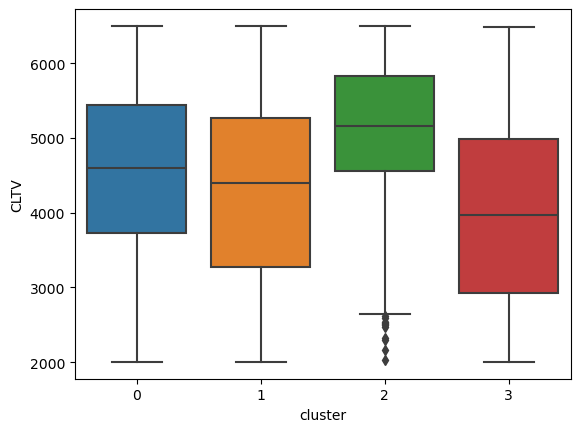

In [706]:
sns.boxplot(x='cluster', y='CLTV', data=df_clustered_2)

<Axes: xlabel='cluster', ylabel='Total Long Distance Charges'>

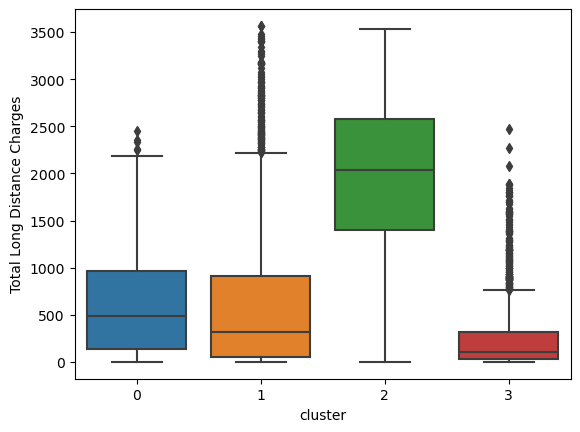

In [707]:
sns.boxplot(x='cluster', y='Total Long Distance Charges', data=df_clustered_2)

<Axes: xlabel='cluster', ylabel='Monthly Charge'>

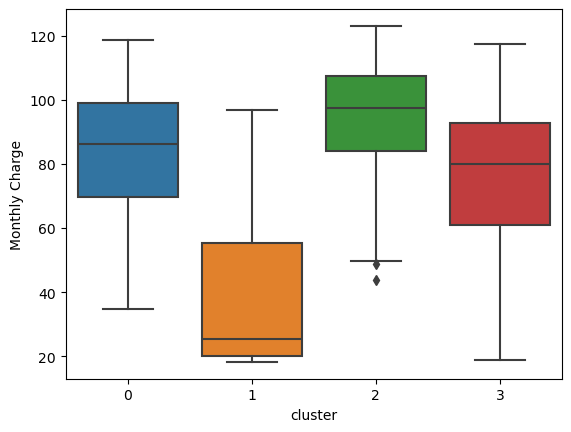

In [699]:
sns.boxplot(x='cluster', y='Monthly Charge', data=df_clustered_2)

<Axes: xlabel='cluster', ylabel='Age'>

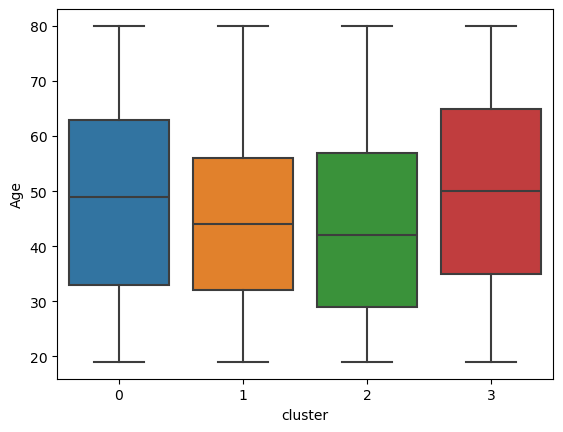

In [700]:
sns.boxplot(x='cluster', y='Age', data=df_clustered_2)

<Axes: xlabel='cluster', ylabel='Avg Monthly GB Download'>

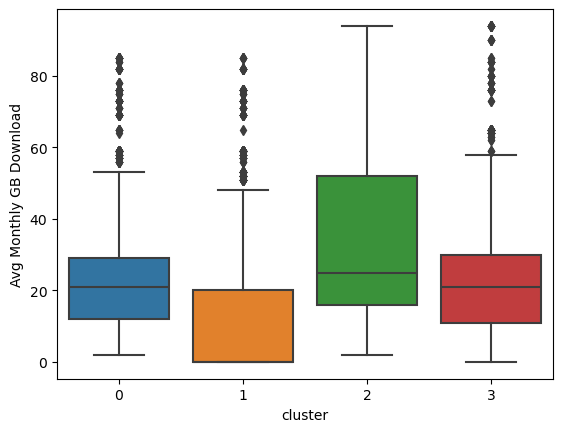

In [708]:
sns.boxplot(x='cluster', y='Avg Monthly GB Download', data=df_clustered_2) 

In [702]:
fig_km3 = px.box(df_clustered_2, x='cluster', y='Avg Monthly GB Download', hover_name='Age', color='cluster', points="all")
#fig_km3.update_traces(quartilemethod="inclusive")
 
fig_km3.show()